# Assignment 6: Hierarchical Clustering

### Assignment Description

As in your previous assignments, the administrators of the Dino Fun World theme park have asked you, one of their data analysts, to perform a data analysis task in order to help them administer the park. In this case, your task builds upon one of the tasks the administrators previously asked you to perform. In a prior task, you were asked to find the distance between a set of visitor trajectories using a simple edit distance algorithm and report the distances. For this task, you must construct and display a dendrogram of those distances. Again, the administrators of the park have provided a database which contains the information needed.

This assignment consists of only one task, which is to generate a dendrogram. Create this dendrogram using the trajectories of the visitors with the IDs: 165316, 1835254, 296394, 404385, and 448990. When performing clustering over the trajectories to inform the dendrogram, use an average distance over all points in the cluster.

### Directions

The database provided by the park administration is formatted to be readable by any SQL database library. The course staff recommends the sqlite3 library. The database contains three tables, named 'checkin', 'attractions', and 'sequences'. The database file is named 'dinofunworld.db' and is available in the read only directory of the Jupyter Notebook environment (i.e., readonly/dinofunworld.db). It can also be accessed by selecting File > Open > dinofunworld.db.

The information contained in each of these tables is listed below:

`checkin`:
    - The check-in data for all visitors for the day in the park. The data includes two types of check-ins: inferred and actual checkins.
    - Fields: visitorID, timestamp, attraction, duration, type
`attraction`:
    - The attractions in the park by their corresponding AttractionID, Name, Region, Category, and type. Regions are from the VAST Challenge map such as Coaster Alley, Tundra Land, etc. Categories include Thrill rides, Kiddie Rides, etc. Type is broken into Outdoor Coaster, Other Ride, Carousel, etc.
    - Fields: AttractionID, Name, Region, Category, type
`sequences`:
    - The check-in sequences of visitors. These sequences list the position of each visitor to the park. If the visitor has not entered the part yet, the sequence has a value of 0 for that time interval. If the visitor is in the park, the sequence lists are the most visited.
    - Fields: visitorID, sequence
    
Using the data provided, create the dendrogram. (Note: If you are unsure of how to create a dendrogram, please refer to the "Jupyter Notebook Demonstration: Dendrograms" video provided in the Jupyter Notebook Assignment 6 section.)

### Submission Directions for Assignment Deliverables

This assignment will be auto-graded. We recommend that you use Jupyter Notebook in your browser to complete and submit this assignment. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment in the cell's display area. The display area should contain only your answer with no extraneous information, or else the answer may not be picked up correctly.

Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed. (Graded Cell and PartID comments must be in the same line for proper execution of code.)

Please execute each cell in Jupyter Notebook before submitting.

If you choose to download the file and work on your assignment locally, you can also upload your file to each part in the programming assignment submission space. The file you submit should be named "Assignment_6.ipynb".

### Evaluation

There is one part in the grading with a total of 1 point. If some part of your data is incorrect, you will get a score of 0.0. If the submission fails, we will return the corresponding error messages. If the submission is correct, you will see "Correct" with 1.0 point for the part.

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import whiten


db_filename = "readonly/dinofunworld.db"

conn = sqlite3.connect(db_filename)
c = conn.cursor()

/opt/conda/lib/python3.6/site-packages/scipy/cluster/vq.py:141: RuntimeWarning: Some columns have standard deviation zero. The values of these columns will not change.
  RuntimeWarning)


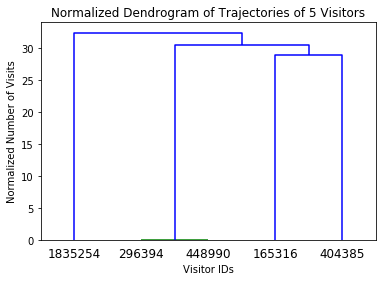

In [18]:
# Graded Cell, PartID:RLU7S
# Create and display a dendrogram of the trajectories of the 5 visitors specified above.
# The clustering algorithm used to create the dendrogram should use the average distance
# between points in a cluster.
c.execute("SELECT * FROM sequences WHERE visitorID IN ('165316', '1835254', '296394', '404385', '448990')")

rows = c.fetchall()
all_seq = {}
for row in rows:
    row_list = list(row)
    row_list_str = str(row_list[2])
    seq = row_list_str.split("-")
    all_seq[int(row_list[1])] = list(map(int, seq))

vals = list(all_seq.values())
X = np.matrix(vals)
Y = whiten(X)
links = linkage(Y, 'average')
keys = list (all_seq.keys())

dendrogram(links, labels=keys)
plt.title("Normalized Dendrogram of Trajectories of 5 Visitors")
plt.xlabel("Visitor IDs")
plt.ylabel("Normalized Number of Visits")
plt.show()